**Collection Data**

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import time

base_url = "https://chothuephongtro.me"
headers = {"User-Agent": "Mozilla/5.0"}

records = []

#Lấy dữ liệu qua các bài đăng
for page_num in range(1,3):
    url = f"{base_url}/da-nang.html?page={page_num}"
    res = requests.get(url, headers=headers)
    soup = BeautifulSoup(res.text, "html.parser")

    for post in soup.find_all("article", class_="post-item"):

        price = post.find("span", class_="post-price").get_text(strip=True) if post.find("span", class_="post-price") else None
        area = post.find("span", class_="acreage").get_text(strip=True) if post.find("span", class_="acreage") else None
        date = post.find("span", class_="date").get_text(strip=True) if post.find("span", class_="date") else None
        location = post.find("span", class_="location").get_text(strip=True) if post.find("span", class_="location") else None

        #Truy cập vào từng bài đăng để lấy thêm thông tin chi tiét
        link_tag = post.find("a")
        detail_url = None
        #Kiểm tra link_tag có tồn tại và có chứa href không
        if link_tag and link_tag.get("href"):
            detail_url = base_url + link_tag["href"] if link_tag["href"].startswith("/") else link_tag["href"]

        if detail_url:
            try:
                detail_res = requests.get(detail_url, headers=headers)
                detail_soup = BeautifulSoup(detail_res.text, "html.parser")
                cond_tag = detail_soup.find("div", class_="section-content")
                details = None
                if cond_tag:
                  paragraphs = cond_tag.find_all("p")
                  all_details = [p.get_text(strip=True) for p in paragraphs]
                  washer      = "1" if any("máy giặt" in d or "full" in d.lower() or "đầy đủ" in d.lower() for d in all_details) else "0"
                  aircon      = "1" if any("điều hòa" in d or "full" in d.lower() or "đầy đủ" in d.lower() for d in all_details) else "0"
                  fridge      = "1" if any("tủ lạnh" in d or "full" in d.lower() or "đầy đủ" in d.lower() for d in all_details) else "0"
                  wifi        = "1" if any("wifi" in d or "full" in d.lower() or "đầy đủ" in d.lower() for d in all_details) else "0"
            except Exception as e:
                print(f"Lỗi khi crawl {detail_url}: {e}")

        #Chuyển thành dictionary để tạo bảng bằng pandas
        record = {
            "Price": price,
            "Area": area,
            "Date": date,
            "Location": location,
            "Detail URL": detail_url,
            "fridge": fridge,
            "washer": washer,
            "air condition" : aircon,
            "wifi" : wifi
        }
        records.append(record)
        #Cài khoảng nghỉ để ko bị web chặn và dính capcha
        time.sleep(0.5)


df = pd.DataFrame(records)
df

,Price,Area,Date,Location,Detail URL,fridge,washer,air condition,wifi
0,1.8triệu/tháng,18m2,1 tuần trước,"Hòa Vang, Đà Nẵng",https://chothuephongtro.me/cho-thue-phong-tro-...,1,1,1,1
1,6.9triệu/tháng,50m2,2 tháng trước,"Cẩm Lệ, Đà Nẵng",https://chothuephongtro.me/cho-thue-can-ho-1k1...,1,1,1,1
2,5triệu/tháng,35m2,2 tháng trước,"Hải Châu, Đà Nẵng",https://chothuephongtro.me/nha-cho-thue-hem-ph...,1,1,1,1
3,2.5triệu/tháng,23m2,4 tháng trước,"Hải Châu, Đà Nẵng",https://chothuephongtro.me/da-nang/hai-chau/15...,0,0,0,1
4,1triệu/tháng,20m2,4 tháng trước,"Hải Châu, Đà Nẵng",https://chothuephongtro.me/da-nang/hai-chau/12...,0,0,0,0
5,3triệu/tháng,5m2,4 tháng trước,"Sơn Trà, Đà Nẵng",https://chothuephongtro.me/em-pass-tro-o-the-l...,1,1,1,1
6,1.9triệu/tháng,20m2,4 tháng trước,"Hải Châu, Đà Nẵng",https://chothuephongtro.me/cho-thue-phong-tro-...,0,0,0,0
7,1.5triệu/tháng,16m2,5 tháng trước,"Ngũ Hành Sơn, Đà Nẵng",https://chothuephongtro.me/cho-thue-phong-tro-...,0,0,0,0
8,2.5triệu/tháng,18m2,5 tháng trước,"Cẩm Lệ, Đà Nẵng",https://chothuephongtro.me/phong-tro-moi-xay-c...,1,1,1,1
9,1.9triệu/tháng,20m2,8 tháng trước,"Hải Châu, Đà Nẵng",https://chothuephongtro.me/cho-thue-phong-tro-...,0,0,0,0


**Clean Data (Basic)**

In [ ]:
import pandas as pd
df = pd.read_csv("/content/chothuephongtro3_danang (1).csv")
df.head()

,Price;Area;Date;Location;Detail URL;fridge;washer;air condition;wifi
6.9triệu/tháng;50m2;1 tháng trước;Cẩm Lệ,Đà Nẵng;https://chothuephongtro.me/cho-thue-c...
5triệu/tháng;35m2;1 tháng trước;Hải Châu,Đà Nẵng;https://chothuephongtro.me/nha-cho-th...
2.5triệu/tháng;23m2;3 tháng trước;Hải Châu,Đà Nẵng;https://chothuephongtro.me/da-nang/ha...
1triệu/tháng;20m2;3 tháng trước;Hải Châu,Đà Nẵng;https://chothuephongtro.me/da-nang/ha...
3triệu/tháng;5m2;3 tháng trước;Sơn Trà,Đà Nẵng;https://chothuephongtro.me/em-pass-tr...


In [ ]:
from datetime import datetime, timedelta
import re


In [ ]:
#làm sạch cột Price : 6.9triệu/tháng50m2' → 6.9
def clean_price(price):
    if pd.isna(price):
        return None
    match = re.search(r'(\d+(\.\d+)?)', str(price))
    return float(match.group(1)) if match else None

df['Price'] = df['Price'].apply(clean_price)

In [ ]:
import numpy as np
# Làm sạch cột Date
def convert_date(x):
    if 'ngày' in x:
        return int(x.split()[0])
    elif 'tuần' in x:
        return int(x.split()[0]) * 7
    elif 'tháng' in x:
        return int(x.split()[0]) * 30
    elif 'năm' in x:
        return int(x.split()[0]) * 365
    else:
        return np.nan

df['Date'] = df['Date'].apply(convert_date)


In [ ]:
#làm sạch Area
def clean_area(area):
    if pd.isna(area):
        return None
    # Tìm số có thể có phần thập phân
    match = re.search(r"(\d+(\.\d+)?)", str(area))
    return float(match.group(1)) if match else None

df["Area"] = df["Area"].apply(clean_area)

In [ ]:
df

,Price,Area,Date,Location,Detail URL,fridge,washer,air condition,wifi
0,1.8,18.0,7,"Hòa Vang, Đà Nẵng",https://chothuephongtro.me/cho-thue-phong-tro-...,1,1,1,1
1,6.9,50.0,60,"Cẩm Lệ, Đà Nẵng",https://chothuephongtro.me/cho-thue-can-ho-1k1...,1,1,1,1
2,5.0,35.0,60,"Hải Châu, Đà Nẵng",https://chothuephongtro.me/nha-cho-thue-hem-ph...,1,1,1,1
3,2.5,23.0,120,"Hải Châu, Đà Nẵng",https://chothuephongtro.me/da-nang/hai-chau/15...,0,0,0,1
4,1.0,20.0,120,"Hải Châu, Đà Nẵng",https://chothuephongtro.me/da-nang/hai-chau/12...,0,0,0,0
5,3.0,5.0,120,"Sơn Trà, Đà Nẵng",https://chothuephongtro.me/em-pass-tro-o-the-l...,1,1,1,1
6,1.9,20.0,120,"Hải Châu, Đà Nẵng",https://chothuephongtro.me/cho-thue-phong-tro-...,0,0,0,0
7,1.5,16.0,150,"Ngũ Hành Sơn, Đà Nẵng",https://chothuephongtro.me/cho-thue-phong-tro-...,0,0,0,0
8,2.5,18.0,150,"Cẩm Lệ, Đà Nẵng",https://chothuephongtro.me/phong-tro-moi-xay-c...,1,1,1,1
9,1.9,20.0,240,"Hải Châu, Đà Nẵng",https://chothuephongtro.me/cho-thue-phong-tro-...,0,0,0,0


Lưu vào MySQL

In [ ]:
df[['District', 'City']] = df['Location'].str.split(',', expand=True)
df['District'] = df['District'].str.strip()
df['City'] = df['City'].str.strip()
df = df.drop(columns=['Location'])
df = df.drop(columns=['Detail URL'])
df

,Price,Area,Date,fridge,washer,air condition,wifi,District,City
0,1.8,18.0,7,1,1,1,1,Hòa Vang,Đà Nẵng
1,6.9,50.0,60,1,1,1,1,Cẩm Lệ,Đà Nẵng
2,5.0,35.0,60,1,1,1,1,Hải Châu,Đà Nẵng
3,2.5,23.0,120,0,0,0,1,Hải Châu,Đà Nẵng
4,1.0,20.0,120,0,0,0,0,Hải Châu,Đà Nẵng
5,3.0,5.0,120,1,1,1,1,Sơn Trà,Đà Nẵng
6,1.9,20.0,120,0,0,0,0,Hải Châu,Đà Nẵng
7,1.5,16.0,150,0,0,0,0,Ngũ Hành Sơn,Đà Nẵng
8,2.5,18.0,150,1,1,1,1,Cẩm Lệ,Đà Nẵng
9,1.9,20.0,240,0,0,0,0,Hải Châu,Đà Nẵng


In [ ]:
df[['fridge','washer','air condition','wifi']] = df[['fridge','washer','air condition','wifi']].astype(int)
df['Total_utilities'] = df[['fridge','washer','air condition','wifi']].sum(axis=1)

làm sạch dữ liệu

In [ ]:
df = df.dropna()
df = df.drop_duplicates()
df = df[(df['Price'] > 0.5) & (df['Price'] <= 10)]
df = df[(df['Area'] > 5) & (df['Area'] < 200)]
df

,Price,Area,Date,fridge,washer,air condition,wifi,District,City,Total_utilities
0,1.8,18.0,7,1,1,1,1,Hòa Vang,Đà Nẵng,4
1,6.9,50.0,60,1,1,1,1,Cẩm Lệ,Đà Nẵng,4
2,5.0,35.0,60,1,1,1,1,Hải Châu,Đà Nẵng,4
3,2.5,23.0,120,0,0,0,1,Hải Châu,Đà Nẵng,1
4,1.0,20.0,120,0,0,0,0,Hải Châu,Đà Nẵng,0
6,1.9,20.0,120,0,0,0,0,Hải Châu,Đà Nẵng,0
7,1.5,16.0,150,0,0,0,0,Ngũ Hành Sơn,Đà Nẵng,0
8,2.5,18.0,150,1,1,1,1,Cẩm Lệ,Đà Nẵng,4
9,1.9,20.0,240,0,0,0,0,Hải Châu,Đà Nẵng,0
11,2.5,20.0,240,0,0,0,0,Ngũ Hành Sơn,Đà Nẵng,0


In [ ]:
print(df.isnull().sum())

Price              0
Area               0
Date               0
fridge             0
washer             0
air condition      0
wifi               0
District           0
City               0
Total_utilities    0
dtype: int64


In [ ]:
df.describe()

,Price,Area,Date,fridge,washer,air condition,wifi,Total_utilities
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,2.487879,25.787879,434.606061,0.212121,0.242424,0.333333,0.333333,1.121212
std,1.246434,11.351645,261.859569,0.415149,0.435194,0.478714,0.478714,1.634732
min,1.000000,12.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.800000,20.000000,240.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.300000,23.000000,365.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.900000,32.000000,730.000000,0.000000,0.000000,1.000000,1.000000,2.000000
max,6.900000,65.000000,730.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

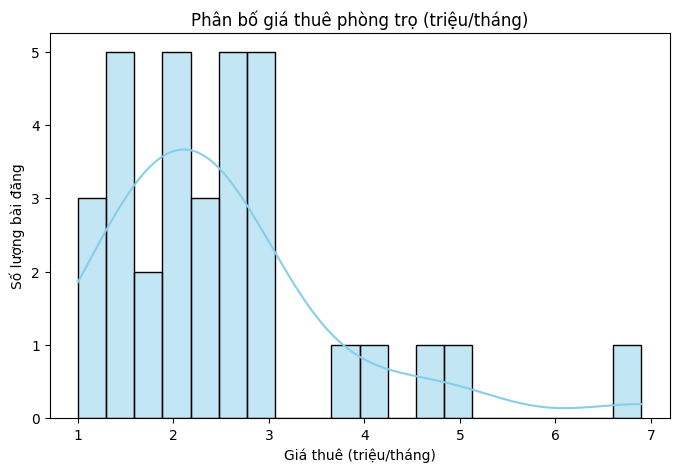

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], bins=20, kde=True, color='skyblue')
plt.title("Phân bố giá thuê phòng trọ (triệu/tháng)")
plt.xlabel("Giá thuê (triệu/tháng)")
plt.ylabel("Số lượng bài đăng")
plt.show()
#Ý nghĩa: Giúp bạn biết giá thuê phổ biến nhất (ví dụ 1–3 triệu/tháng).

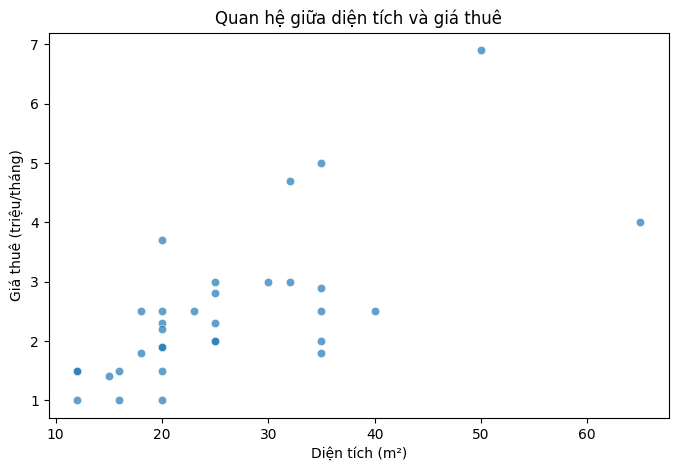

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Area', y='Price', data=df, alpha=0.7)
plt.title("Quan hệ giữa diện tích và giá thuê")
plt.xlabel("Diện tích (m²)")
plt.ylabel("Giá thuê (triệu/tháng)")
plt.show()
#Thấy được xu hướng — phòng lớn hơn thường giá cao hơn, nhưng có thể có ngoại lệ

In [ ]:
df['District'].value_counts()

,count
District,
Hải Châu,8
Thanh Khê,7
Ngũ Hành Sơn,5
Sơn Trà,5
Liên Chiểu,5
Cẩm Lệ,2
Hòa Vang,1


/tmp/ipython-input-127214413.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='District', y='Price', data=df, palette='Set2')


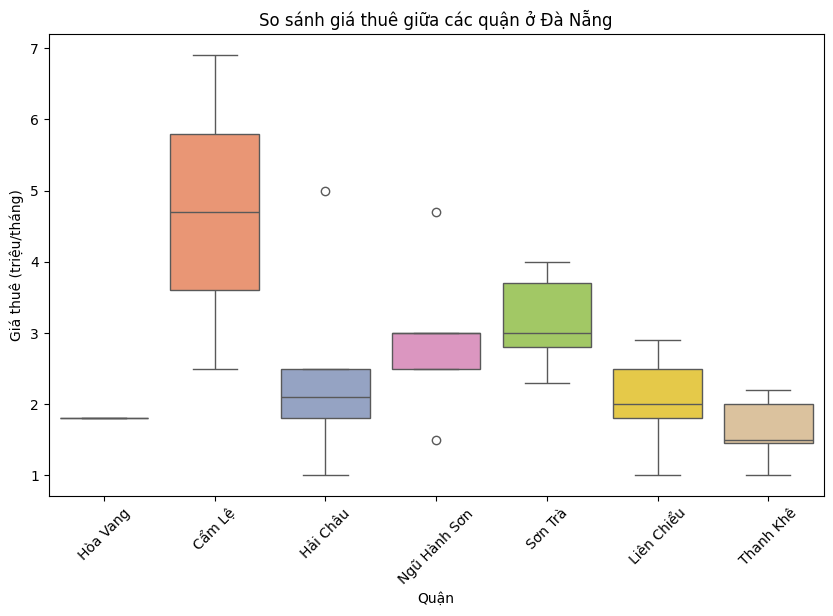

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='District', y='Price', data=df, palette='Set2')
plt.title("So sánh giá thuê giữa các quận ở Đà Nẵng")
plt.xlabel("Quận")
plt.ylabel("Giá thuê (triệu/tháng)")
plt.xticks(rotation=45)
plt.show()
#Giúp bạn xem quận nào đắt nhất (ví dụ Hải Châu cao hơn Cẩm Lệ).


/tmp/ipython-input-1982144525.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Total_utilities', data=df, palette='coolwarm')


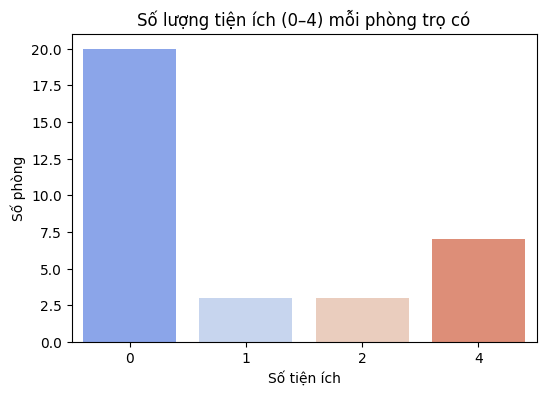

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Total_utilities', data=df, palette='coolwarm')
plt.title("Số lượng tiện ích (0–4) mỗi phòng trọ có")
plt.xlabel("Số tiện ích")
plt.ylabel("Số phòng")
plt.show()
#Xem đa số phòng có bao nhiêu tiện ích

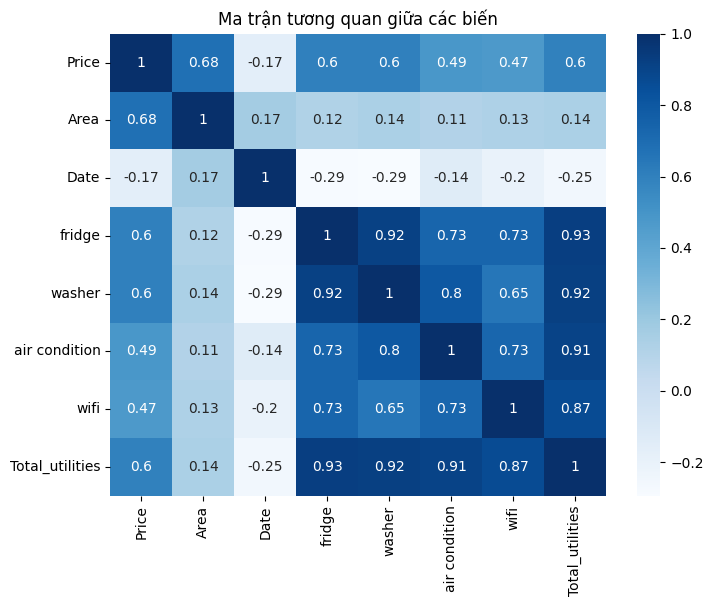

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')
plt.title("Ma trận tương quan giữa các biến")
plt.show()
#Thấy được biến nào ảnh hưởng nhiều nhất đến Price

/tmp/ipython-input-2284778103.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='District', y='Price_per_m2', data=price_per_m2, palette='viridis')


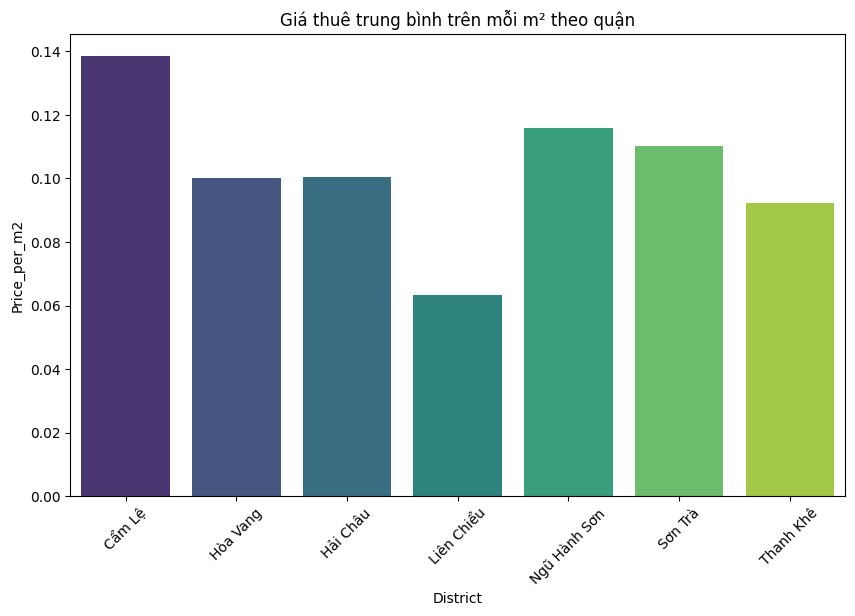

In [ ]:
df['Price_per_m2'] = df['Price'] / df['Area']
plt.figure(figsize=(10,6))
price_per_m2 = df.groupby('District')['Price_per_m2'].mean().reset_index()
sns.barplot(x='District', y='Price_per_m2', data=price_per_m2, palette='viridis')
plt.title("Giá thuê trung bình trên mỗi m² theo quận")
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-83662151.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Date', y='Price', data=df, ci=None)


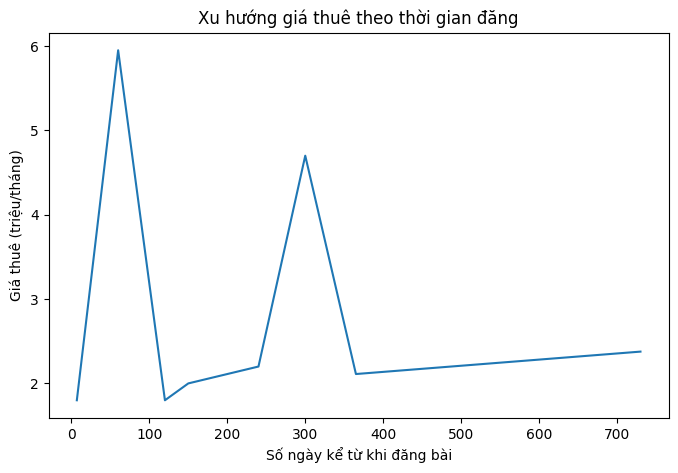

In [ ]:
plt.figure(figsize=(8,5))
sns.lineplot(x='Date', y='Price', data=df, ci=None)
plt.title("Xu hướng giá thuê theo thời gian đăng")
plt.xlabel("Số ngày kể từ khi đăng bài")
plt.ylabel("Giá thuê (triệu/tháng)")
plt.show()

TypeError: Invalid object type at position 0

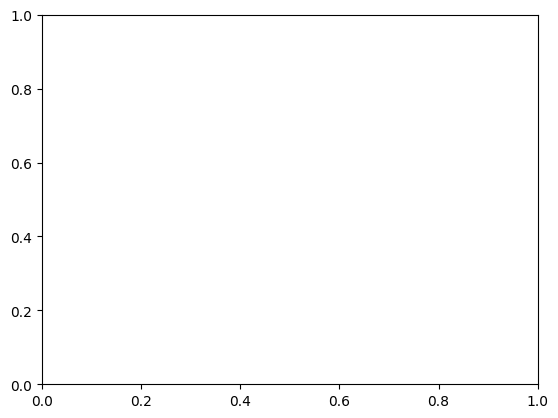

In [ ]:
df['PostDate'] = pd.to_datetime('today') - pd.to_timedelta(df['Date'], unit='D')
df_month = df.groupby(df['PostDate'].dt.to_period('M'))['Price'].mean().reset_index()
sns.lineplot(x='PostDate', y='Price', data=df_month)